In [139]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import Table, Column
from tqdm import tqdm
import time


In [141]:
s = Table.read("sagitta1.fits")
g = Table.read("Ba_Teff&logn.fits")
h = Table.read("Pa_Teff&logn.fits")

In [117]:
print(g)
print(h)

  teff  logn           model [18]         
------- ---- -----------------------------
 3750.0  8.0  1.0 .. 0.0004664525339043541
 5000.0  8.0 1.0 .. 0.00046052631578947373
 7500.0  8.0 1.0 .. 0.00043868255080588655
 8750.0  8.0  1.0 .. 0.0003615631005765535
10000.0  8.0 1.0 .. 0.00020428940568475453
12500.0  8.0  1.0 .. 7.139107611548557e-05
15000.0  8.0  1.0 .. 6.857440166493236e-05
 3750.0  8.2  1.0 .. 0.0003025091799265606
 5000.0  8.2  1.0 .. 0.0002936131386861314
 7500.0  8.2 1.0 .. 0.00026975638740344625
    ...  ...                           ...
 8750.0 12.2     1.0 .. 0.2698381750828622
10000.0 12.2     1.0 .. 0.3951140722794266
12500.0 12.2     1.0 .. 0.4655441763582711
15000.0 12.2     1.0 .. 0.5064712303134259
 3750.0 12.4   1.0 .. 0.003933019976498238
 5000.0 12.4   1.0 .. 0.003305884936319719
 7500.0 12.4    1.0 .. 0.07022890604205483
 8750.0 12.4     1.0 .. 0.3805225653206651
10000.0 12.4     1.0 .. 0.5523012552301256
12500.0 12.4     1.0 .. 0.6639237765266348
15000.0 12.

In [126]:
#print(s['ba_observed'])
#print(s['pa_observed'])
s['bapa_observed']=Column(length=len(s),dtype=float, shape=(26,))+np.nan
s['bapa_goodlines']=0

for i in range(len(s)):
    ba_goodlines = s["ba_goodlines"][i]
    pa_goodlines = s["pa_goodlines"][i]
    if (ba_goodlines != 0) & (pa_goodlines != 0):
        ba = s["ba_observed"][i]
        ba = ba[:ba_goodlines]
        pa = s["pa_observed"][i]
        pa = pa[:pa_goodlines]
        newline = np.concatenate((ba,pa))
        bapa_goodlines = ba_goodlines + pa_goodlines
        s['bapa_observed'][i][:len(newline)] = newline
        s['bapa_goodlines'][i] = bapa_goodlines 
        print(ba, pa, newline)

[1.0 0.17238453788642027 0.049446948406596324] [1.0 0.4344425354914549 0.4333122343792386] [1.         0.17238454 0.04944695 1.         0.43444254 0.43331223]
[1.0] [1.0 0.3353119474614802 0.2542308663803991] [1.         1.         0.33531195 0.25423087]
[1.0 0.556802576453612 0.2534070392393328 0.351195164966923
 0.4144493318369083 0.5285494203676465] [1.0] [1.         0.55680258 0.25340704 0.35119516 0.41444933 0.52854942
 1.        ]
[1.0] [1.0] [1. 1.]
[1.0 0.19291317400708036 0.07845975057299344 0.09512767262436378
 0.4382727341202802 0.24011384545855619 0.09049530306780153] [1.0] [1.         0.19291317 0.07845975 0.09512767 0.43827273 0.24011385
 0.0904953  1.        ]
[1.0 0.43091827832781954 0.36747324235694423 0.23100865862588116
 0.47408332870154446 0.26602981583201835 0.28997334506182837
 0.07749748070960617] [1.0 0.9346570397111913] [1.         0.43091828 0.36747324 0.23100866 0.47408333 0.26602982
 0.28997335 0.07749748 1.         0.93465704]
[1.0 0.8277358153359922 0.4262

 0.7541133286035968 0.4853758598352818 0.5447669576482926] [1.0] [1.         0.22066689 0.12202721 0.20248003 0.75411333 0.48537586
 0.54476696 1.        ]
[1.0] [1.0] [1. 1.]
[1.0 0.12526681392564165] [1.0 0.7789558491782146 0.6926522719948437] [1.         0.12526681 1.         0.77895585 0.69265227]
[1.0 0.15686325644469365 0.15447705728181926 0.11934255649293919
 0.5181442411756269] [1.0] [1.         0.15686326 0.15447706 0.11934256 0.51814424 1.        ]
[1.0 0.1333533936023173 0.13617726223621296] [1.0] [1.         0.13335339 0.13617726 1.        ]
[1.0 0.827859597313979 0.4964117624706183 0.35672835250498064
 0.8021529425176291 0.008194318533436837] [1.0 0.8442025671514375 0.9716759657306625 0.5667550839964633
 0.3226927650233239 0.5067532546723985] [1.         0.8278596  0.49641176 0.35672835 0.80215294 0.00819432
 1.         0.84420257 0.97167597 0.56675508 0.32269277 0.50675325]
[1.0 0.4462765928557075 0.15533070097780965 0.2222692932288357
 0.6078532543264592] [1.0] [1.      

 0.78588044 0.84985006 0.40167036 0.68823744 0.57518007]
[1.0 0.5567023883126102 0.32575011640066254 0.244359338386267
 0.44514475662720493 0.00016792226725592118 0.00436597894865395] [1.0 0.7398245576590613 0.7145113439907798 0.3319531300023478
 0.48551853669989115 0.3695387701961454] [1.00000000e+00 5.56702388e-01 3.25750116e-01 2.44359338e-01
 4.45144757e-01 1.67922267e-04 4.36597895e-03 1.00000000e+00
 7.39824558e-01 7.14511344e-01 3.31953130e-01 4.85518537e-01
 3.69538770e-01]
[1.0 0.37595381930460464 0.2512194030518638] [1.0 0.6754790201309726 0.6181005509164617 0.3279165656075673
 0.2682859221787187 0.5091299677765844] [1.         0.37595382 0.2512194  1.         0.67547902 0.61810055
 0.32791657 0.26828592 0.50912997]
[1.0 0.7465061423206839 0.2411714754778933 0.4571094295472987
 1.0021738720208329] [1.0 1.5441294860387271 2.084170162281259] [1.         0.74650614 0.24117148 0.45710943 1.00217387 1.
 1.54412949 2.08417016]
[1.0] [1.0] [1. 1.]
[1.0 0.618727370301684 0.5592329169

[1.0 0.5939737703519172 0.08088620466520816] [1.0 0.7260528132550915 0.8333189506385916] [1.         0.59397377 0.0808862  1.         0.72605281 0.83331895]
[1.0 0.6134177114388243 0.11307429288128171 0.20241040010750494
 0.17298838847109063] [1.0 1.0784226190476192 0.8314484126984126] [1.         0.61341771 0.11307429 0.2024104  0.17298839 1.
 1.07842262 0.83144841]
[1.0 0.1384661145813353] [1.0 0.6764830894407675 0.6004614730706175] [1.         0.13846611 1.         0.67648309 0.60046147]
[1.0 0.6186289155930593 0.34220662096560345 0.32329257694660535
 0.5016186157881333 0.38640677797002215 0.2229935334133233
 0.24263483870290198] [1.0 0.40356028629106255] [1.         0.61862892 0.34220662 0.32329258 0.50161862 0.38640678
 0.22299353 0.24263484 1.         0.40356029]
[1.0 0.17119106899044254 0.1496533076325864 0.17920582014831474
 1.4774181457981956 0.1147029689717024] [1.0] [1.         0.17119107 0.14965331 0.17920582 1.47741815 0.11470297
 1.        ]
[1.0 0.7252293361446353 0.4703

 0.3644800036332946 0.05413041256817158 0.30447954947146916] [1.0 0.735144572770064 0.6589120766335956 0.45622706949638425
 0.5316809607512358 0.3081859685962698 0.044179928509915416] [1.         0.37731575 0.26862158 0.15922157 0.36448    0.05413041
 0.30447955 1.         0.73514457 0.65891208 0.45622707 0.53168096
 0.30818597 0.04417993]
[1.0 0.2185688476075415 0.2019688690364032] [1.0] [1.         0.21856885 0.20196887 1.        ]
[1.0 0.4322610881074511 0.14952207321343963] [1.0] [1.         0.43226109 0.14952207 1.        ]
[1.0 0.2788696302096309] [1.0] [1.         0.27886963 1.        ]
[1.0 0.4926225591275374 0.23185260828865628 0.22343761251088287
 1.9480371555939593] [1.0 1.0563225412339645 0.8567937865433284 0.4914564970765337
 0.728946679465922 0.5544113797015446 0.4763242865869622] [1.         0.49262256 0.23185261 0.22343761 1.94803716 1.
 1.05632254 0.85679379 0.4914565  0.72894668 0.55441138 0.47632429]
[1.0 0.1658000101363337 0.27480411535147736] [1.0 0.827770360480640

[1.0 1.771175937203226] [1.0] [1.         1.77117594 1.        ]
[1.0] [1.0] [1. 1.]
[1.0 0.0006189056737230334] [1.0] [1.00000000e+00 6.18905674e-04 1.00000000e+00]
[1.0] [1.0] [1. 1.]
[1.0] [1.0] [1. 1.]


In [127]:
#print(s['ba_observed'])
#print(s['pa_observed'])
s['bapa_avg_std']=Column(length=len(s),dtype=float, shape=(26,))+np.nan


for i in range(len(s)):
    ba_goodlines = s["ba_goodlines"][i]
    pa_goodlines = s["pa_goodlines"][i]
    if (ba_goodlines != 0) & (pa_goodlines != 0):
        ba_std = s["ba_avg_std"][i]
        ba_std = ba_std[:ba_goodlines]
        pa_std = s["pa_avg_std"][i]
        pa_std = pa_std[:pa_goodlines]
        newline_std = np.concatenate((ba_std,pa_std))
        s['bapa_avg_std'][i][:len(newline_std)] = newline_std
        print(ba_std, pa_std, newline_std)

[0.915699999999994 0.2436999999999987 0.30580000000000007] [0.012700000000000156 0.015800000000000036 0.02410000000000001] [0.9157 0.2437 0.3058 0.0127 0.0158 0.0241]
[0.5866000000000007] [0.09620000000000006 0.053200000000000025 0.14200000000000002] [0.5866 0.0962 0.0532 0.142 ]
[0.2281999999999993 0.24020000000000064 0.26239999999999997 0.2801
 0.5408999999999997 0.7142999999999997] [0.1261] [0.2282 0.2402 0.2624 0.2801 0.5409 0.7143 0.1261]
[0.8419000000000025] [0.21450000000000014] [0.8419 0.2145]
[0.4527000000000001 0.14570000000000016 0.11519999999999997
 0.18989999999999996 0.4444999999999997 0.7241999999999997
 0.5932000000000002] [0.12029999999999996] [0.4527 0.1457 0.1152 0.1899 0.4445 0.7242 0.5932 0.1203]
[0.9138999999999982 0.8634999999999984 0.4924000000000017
 0.4482999999999997 0.7740999999999971 1.3108000000000004 2.6372
 0.3495999999999997] [0.1763999999999999 0.09819999999999984] [0.9139 0.8635 0.4924 0.4483 0.7741 1.3108 2.6372 0.3496 0.1764 0.0982]
[1.4734999999999

 1.3821000000000003] [0.3178] [0.4891 0.2382 0.2214 0.2015 0.988  0.4924 1.3821 0.3178]
[1.4451999999999998] [0.13119999999999998] [1.4452 0.1312]
[0.8963000000000001 0.5158] [0.16220000000000034 0.24129999999999985 0.2511000000000001] [0.8963 0.5158 0.1622 0.2413 0.2511]
[1.0568000000000008 0.3272999999999997 0.5782000000000003 0.6995
 0.9165999999999999] [0.10119999999999996] [1.0568 0.3273 0.5782 0.6995 0.9166 0.1012]
[1.4133999999999993 0.2654999999999994 0.6436000000000002] [0.20110000000000006] [1.4134 0.2655 0.6436 0.2011]
[0.5918999999999954 0.8003 0.9184999999999981 0.30380000000000074
 1.2284000000000006 1.3783000000000003] [0.5939999999999999 0.2195999999999998 0.36850000000000005
 0.16710000000000003 0.15810000000000013 0.17169999999999996] [0.5919 0.8003 0.9185 0.3038 1.2284 1.3783 0.594  0.2196 0.3685 0.1671
 0.1581 0.1717]
[1.6514000000000024 1.3873999999999995 0.9045999999999994
 1.0296000000000003 2.25] [0.01670000000000016] [1.6514 1.3874 0.9046 1.0296 2.25   0.0167]


 0.2920999999999998] [1.3954 1.9681 0.8931 1.194  2.1464 2.5539 3.6191 0.4905 0.3491 0.4333
 0.3232 0.3768 0.2921]
[1.9757999999999996 2.2108999999999988 4.042599999999998] [0.3668999999999998 0.17469999999999986 0.18059999999999987
 0.07799999999999996 0.07469999999999999 0.1352] [1.9758 2.2109 4.0426 0.3669 0.1747 0.1806 0.078  0.0747 0.1352]
[1.6174 2.3995999999999995 1.3806000000000003 1.0611999999999995
 2.0299000000000014] [0.6053000000000006 0.49409999999999954 0.6709999999999994] [1.6174 2.3996 1.3806 1.0612 2.0299 0.6053 0.4941 0.671 ]
[0.8524999999999991] [0.28580000000000005] [0.8525 0.2858]
[0.7631999999999994 0.4670000000000005 0.8981999999999992
 0.7657999999999996 2.2081999999999997 0.9067000000000007] [0.29869999999999997] [0.7632 0.467  0.8982 0.7658 2.2082 0.9067 0.2987]
[1.522200000000005 3.0101000000000013 1.2386999999999997 4.4787 2.6753
 2.753700000000002] [0.28530000000000033 0.35020000000000007 0.23170000000000002] [1.5222 3.0101 1.2387 4.4787 2.6753 2.7537 0.28

 3.0208999999999975 2.099400000000001] [0.3671 0.34099999999999997 0.29170000000000007] [2.0423 1.4334 1.1546 1.3967 3.0209 2.0994 0.3671 0.341  0.2917]
[0.736699999999999 1.2333999999999996 2.5174000000000003 4.480200000000002
 4.8355 5.5626999999999995] [0.28910000000000013 0.16879999999999984 0.20200000000000007] [0.7367 1.2334 2.5174 4.4802 4.8355 5.5627 0.2891 0.1688 0.202 ]
[1.1007999999999996] [0.29789999999999994] [1.1008 0.2979]
[2.845700000000001 0.49630000000000063 0.6206999999999998
 0.8800000000000003] [0.2924 0.22720000000000007 0.2568999999999999] [2.8457 0.4963 0.6207 0.88   0.2924 0.2272 0.2569]
[2.962299999999999 2.7520000000000024 1.9386999999999972
 1.6602999999999994 5.346800000000002 4.7722 6.3605 7.318699999999999] [0.44090000000000007 0.5935000000000006 0.5042999999999997
 0.5095999999999998 0.34670000000000023 0.3489 0.29510000000000003 0.3509] [2.9623 2.752  1.9387 1.6603 5.3468 4.7722 6.3605 7.3187 0.4409 0.5935
 0.5043 0.5096 0.3467 0.3489 0.2951 0.3509]
[2.

[3.931599999999996 1.572099999999999] [0.3336000000000001 0.36030000000000006 0.27870000000000017] [3.9316 1.5721 0.3336 0.3603 0.2787]
[3.3744000000000014 3.2895000000000003] [0.4575] [3.3744 3.2895 0.4575]
[6.697099999999999] [0.7858999999999998] [6.6971 0.7859]
[2.4299000000000035 2.3897999999999993] [0.2581] [2.4299 2.3898 0.2581]
[2.6425000000000054 2.653699999999997 3.9510000000000005 3.870799999999999
 4.7742] [0.5361999999999998 0.3270999999999997 0.3756999999999999] [2.6425 2.6537 3.951  3.8708 4.7742 0.5362 0.3271 0.3757]
[1.8988999999999976 1.208400000000001 3.0327] [0.26350000000000007 0.4092 0.40880000000000005 0.3828] [1.8989 1.2084 3.0327 0.2635 0.4092 0.4088 0.3828]
[2.6017999999999972 2.8638999999999992] [0.38750000000000007] [2.6018 2.8639 0.3875]
[2.636499999999998 5.936400000000003 4.5825 5.119600000000002] [0.4201999999999999 0.45150000000000023 0.5191999999999999] [2.6365 5.9364 4.5825 5.1196 0.4202 0.4515 0.5192]
[4.301400000000001 9.634299999999996 3.49269999999

In [24]:
print(s['halpha_eqw_std'][1])

[-5.4236 -5.2921 -5.164 ]


In [154]:
s['pa_best_model']=Column(length=len(s),dtype=float, shape=(15,))+np.nan
s['pa_best_chisquare'] = 0.
s['pa_best_Teff'] = 0.
s['pa_best_logn'] = 0.

b = np.where(s['pa_goodlines'] > 2)[0]
print(len(b))

for i in tqdm(range(len(b))):
    start = time.time()
    observed = s['pa_observed'][b[i]]
    #print(observed)
    chisquare_list = []
    goodlines=np.arange(0,s['pa_goodlines'][b[i]])
    #goodlines=np.delete(goodlines,4)
    obs_error = s['pa_avg_std'][b[i]]
    obs_error = obs_error[goodlines]
    
    observed=observed[goodlines]
    int1 = time.time()
    for k in range(len(h)):
        
        expected = h['model'][k]
        expected = expected[goodlines]
        
        #chi_squared = np.sum((observed - expected)**2 / expected)# change to  np.sum((observed - expected)**2 / obs_error^2)/(len(goodlines)-1)
        chi_squared = np.sum((observed - expected)**2 / obs_error**2)
        chisquare_list.append(chi_squared)
        #print(k,g['teff'][k],g['logn'][k], chi_squared)
    
    #print(chisquare_list)
    int2 = time.time()
    minim = np.min(chisquare_list)
    a = chisquare_list.index(minim)
    
    #print(time.time()-int2)
    int2 = time.time()
    best_expected = h['model'][a]
    #print(time.time()-int2)
    #int2 = time.time()
    #print(g['teff'][a],g['logn'][a])
    best_expected = best_expected[:len(observed)]
    #print(time.time()-int2)
    #int2 = time.time()
    s['pa_best_model'][b[i]][goodlines] = best_expected
    #print(time.time()-int2)
    #int2 = time.time()
    s['pa_best_chisquare'][b[i]] = minim
    #print(time.time()-int2)
    #int2 = time.time()
    s['pa_best_Teff'][b[i]] = h['teff'][a]
    #print(time.time()-int2)
    #int2 = time.time()
    s['pa_best_logn'][b[i]] = h['logn'][a]
    #print(time.time()-int2)
    #int2 = time.time()
    #print(best_expected)
    #end = time.time()
    #print(end-int2, int2-int1, int1-start)
    
    #print(k, chisquare_list.index(minimum_chisquare), min(chisquare_list))
    #plt.plot(lst2)
    #plt.plot(lst, color='black')
    #plt.show()

127


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [00:13<00:00,  9.76it/s]


In [157]:
s['ba_best_model']=Column(length=len(s),dtype=float, shape=(15,))+np.nan
s['ba_best_chisquare'] = 0.
s['ba_best_Teff'] = 0.
s['ba_best_logn'] = 0.

b = np.where(s['ba_goodlines'] > 2)[0]
print(len(b))

for i in tqdm(range(len(b))):
    start = time.time()
    observed = s['ba_observed'][b[i]]
    #print(observed)
    chisquare_list = []
    goodlines=np.arange(0,s['ba_goodlines'][b[i]])
    goodlines=np.delete(goodlines,4)
    obs_error = s['ba_avg_std'][b[i]]
    obs_error = obs_error[goodlines]
    
    observed=observed[goodlines]
    int1 = time.time()
    for k in range(len(h)):
        
        expected = g['model'][k]
        expected = expected[goodlines]
        
        #chi_squared = np.sum((observed - expected)**2 / expected)# change to  np.sum((observed - expected)**2 / obs_error^2)/(len(goodlines)-1)
        chi_squared = np.sum((observed - expected)**2 / obs_error**2)
        chisquare_list.append(chi_squared)
        #print(k,g['teff'][k],g['logn'][k], chi_squared)
    
    #print(chisquare_list)
    int2 = time.time()
    minim = np.min(chisquare_list)
    a = chisquare_list.index(minim)
    
    #print(time.time()-int2)
    int2 = time.time()
    best_expected = g['model'][a]
    #print(time.time()-int2)
    #int2 = time.time()
    #print(g['teff'][a],g['logn'][a])
    best_expected = best_expected[:len(observed)]
    #print(time.time()-int2)
    #int2 = time.time()
    s['ba_best_model'][b[i]][goodlines] = best_expected
    #print(time.time()-int2)
    #int2 = time.time()
    s['ba_best_chisquare'][b[i]] = minim
    #print(time.time()-int2)
    #int2 = time.time()
    s['ba_best_Teff'][b[i]] = g['teff'][a]
    #print(time.time()-int2)
    #int2 = time.time()
    s['ba_best_logn'][b[i]] = g['logn'][a]
    #print(time.time()-int2)
    #int2 = time.time()
    #print(best_expected)
    #end = time.time()
    #print(end-int2, int2-int1, int1-start)
    
    #print(k, chisquare_list.index(minimum_chisquare), min(chisquare_list))
    #plt.plot(lst2)
    #plt.plot(lst, color='black')
    #plt.show()

367


  0%|                                                                                          | 0/367 [00:00<?, ?it/s]


IndexError: index 4 is out of bounds for axis 0 with size 3

In [129]:
s['bapa_best_model']=Column(length=len(s),dtype=float, shape=(26,))+np.nan
s['bapa_best_chisquare'] = 0.

for i in range(len(s)):
    ba_goodlines = s["ba_goodlines"][i]
    pa_goodlines = s["pa_goodlines"][i]
    if (ba_goodlines != 0) & (pa_goodlines != 0):    
        observed = s['bapa_observed'][i]
        chisquare_list = []
        goodlines=np.arange(0,s['bapa_goodlines'][i])
        #print(s['bapa_goodlines'][i])
        ba_goodlines=np.arange(0,s['ba_goodlines'][i])
        pa_goodlines=np.arange(0,s['pa_goodlines'][i])
        #goodlines=np.delete(goodlines,4)
        obs_error = s['bapa_avg_std'][i]
        observed = observed[goodlines]
        obs_error = obs_error[goodlines]
        for k in range(len(h)):        
            expected1 = g['model'][k]
            expected1 = expected1[ba_goodlines]
            expected2 = h['model'][k]
            expected1 = expected2[pa_goodlines]
            expected = np.concatenate((expected1, expected2))
            expected = expected[:len(observed)]
            #print(observed)
            #print(expected)
            #print(obs_error)
            #chi_squared = np.sum((observed - expected)**2 / expected)# change to  np.sum((observed - expected)**2 / obs_error^2)/(len(goodlines)-1)
            chi_squared = np.sum((observed - expected)**2 / obs_error**2)
            #print(chi_squared)
            chisquare_list.append(chi_squared)
            #print(k,g['teff'][k],g['logn'][k], chi_squared)
        #print(chisquare_list)
        a = chisquare_list.index(min(chisquare_list))
        best_expected1 = g['model'][a]
        best_expected2 = h['model'][a]
        best_expected = np.concatenate((best_expected1, best_expected1))
        best_expected = best_expected[:len(observed)]
        s['bapa_best_model'][i][goodlines] = best_expected
        s['bapa_best_chisquare'][i] = min(chisquare_list)
        #print(best_expected)


        #print(k, chisquare_list.index(minimum_chisquare), min(chisquare_list))
        #plt.plot(lst2)
        #plt.plot(lst, color='black')
        #plt.show()

6
4
7
2
8
10
11
6
4
11
12
8
11
8
13
6
7
12
7
9
2
2
2
8
4
8
4
9
5
11
2
4
13
4
2
4
6
11
10
11
11
10
8
2
5
6
4
12
6
9
6
8
8
4
11
11
9
6
7
9
3
2
8
11
6
8
7
4
8
6
9
12
2
8
2
6
6
11
10
11
4
11
6
3
6
11
13
9
8
2
7
9
11
9
6
7
11
2
4
9
8
2
9
9
6
6
10
8
9
4
12
7
15
3
8
9
11
9
11
5
6
7
9
6
8
5
10
7
7
9
9
2
7
16
6
8
10
6
4
7
9
7
7
3
4
12
11
7
9
3
7
10
8
7
2
6
8
6
4
6
11
7
11
7
14
4
4
3
12
5
6
2
7
8
6
5
3
2
3
8
7
3
7
12
9
4
4
5
4
7
3
3
3
3
5
4
3
8
3
8
7
3
11
7
6
9
11
2
5
8
11
3
6
6
9
6
3
5
3
2
3
2
2


In [ ]:
plt.scatter(g['teff'],g['logn'],c=np.log10(chisquare_list))
plt.show()
plt.plot(g[''])

In [7]:
print(g)

  teff  logn           model [18]         
------- ---- -----------------------------
 3750.0  8.0  1.0 .. 0.0004664525339043541
 5000.0  8.0 1.0 .. 0.00046052631578947373
 7500.0  8.0 1.0 .. 0.00043868255080588655
 8750.0  8.0  1.0 .. 0.0003615631005765535
10000.0  8.0 1.0 .. 0.00020428940568475453
12500.0  8.0  1.0 .. 7.139107611548557e-05
15000.0  8.0  1.0 .. 6.857440166493236e-05
 3750.0  8.2  1.0 .. 0.0003025091799265606
 5000.0  8.2  1.0 .. 0.0002936131386861314
 7500.0  8.2 1.0 .. 0.00026975638740344625
    ...  ...                           ...
 8750.0 12.2     1.0 .. 0.2698381750828622
10000.0 12.2     1.0 .. 0.3951140722794266
12500.0 12.2     1.0 .. 0.4655441763582711
15000.0 12.2     1.0 .. 0.5064712303134259
 3750.0 12.4   1.0 .. 0.003933019976498238
 5000.0 12.4   1.0 .. 0.003305884936319719
 7500.0 12.4    1.0 .. 0.07022890604205483
 8750.0 12.4     1.0 .. 0.3805225653206651
10000.0 12.4     1.0 .. 0.5523012552301256
12500.0 12.4     1.0 .. 0.6639237765266348
15000.0 12.

In [37]:
print(observed)
print(goodlines)

[1.0 0.36817808046099565 0.15876340276006973 0.1396892727183269
 0.2294784370716396 0.06387966365971742 0.12792161732455118
 0.027070037574902974 -- -- -- -- -- -- --]
0


0 3750.0 8.0


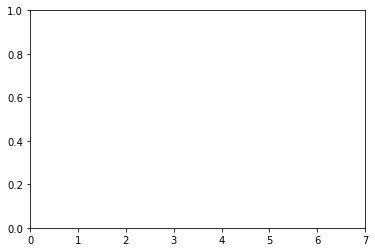

1 5000.0 8.0


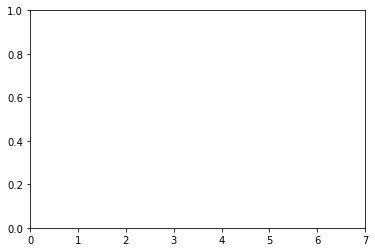

2 7500.0 8.0


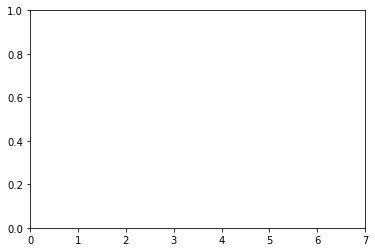

3 8750.0 8.0


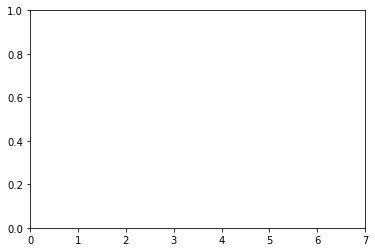

4 10000.0 8.0


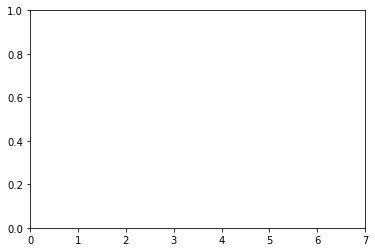

5 12500.0 8.0


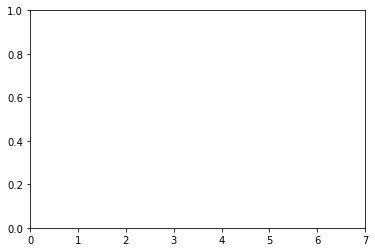

6 15000.0 8.0


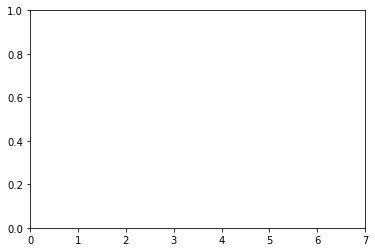

7 3750.0 8.2


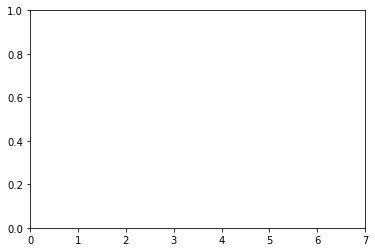

8 5000.0 8.2


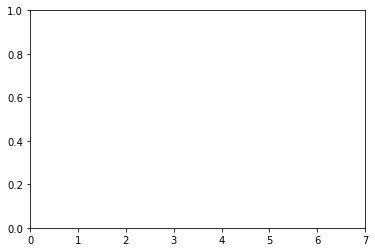

9 7500.0 8.2


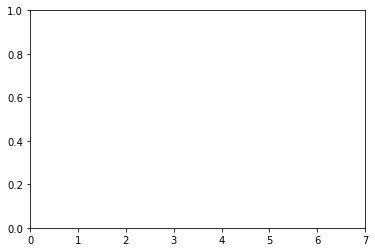

10 8750.0 8.2


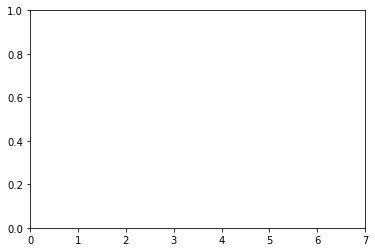

11 10000.0 8.2


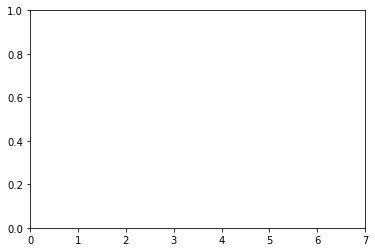

12 12500.0 8.2


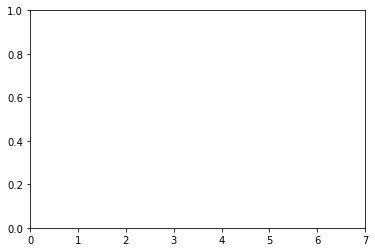

13 15000.0 8.2


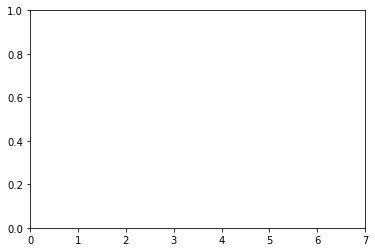

14 3750.0 8.4


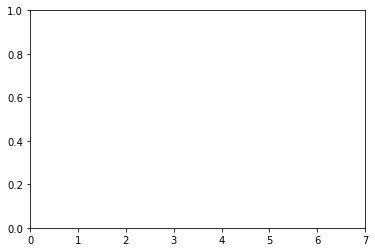

15 5000.0 8.4


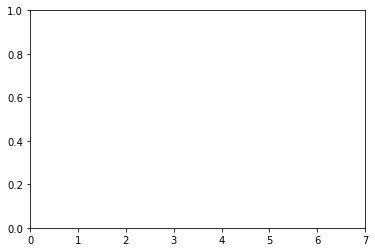

16 7500.0 8.4


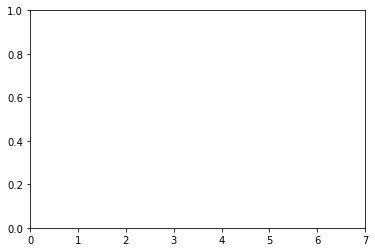

17 8750.0 8.4


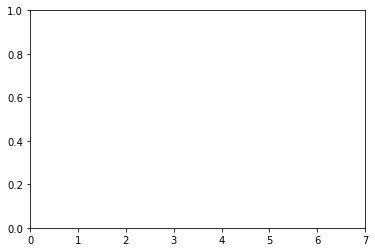

18 10000.0 8.4


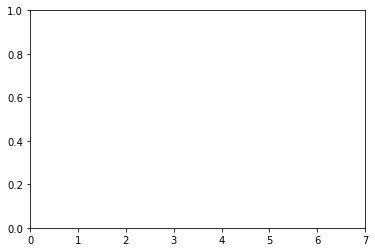

19 12500.0 8.4


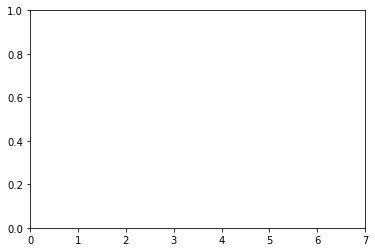

20 15000.0 8.4


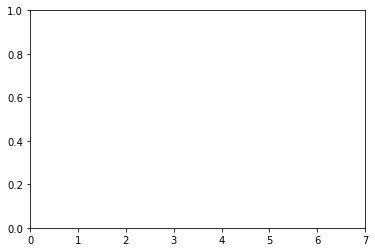

21 3750.0 8.6


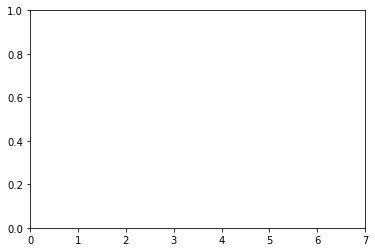

22 5000.0 8.6


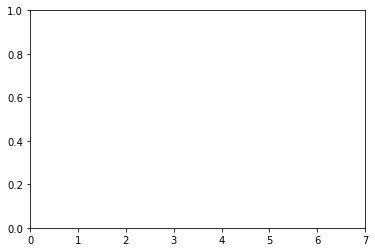

23 7500.0 8.6


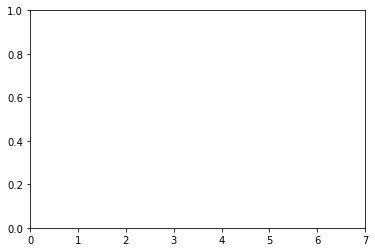

24 8750.0 8.6


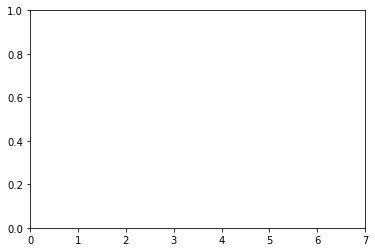

25 10000.0 8.6


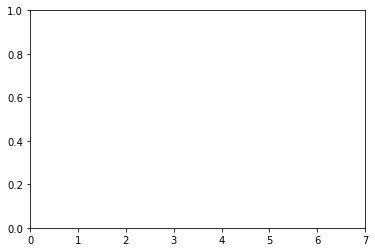

26 12500.0 8.6


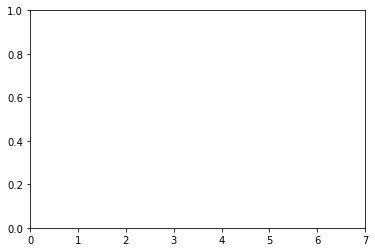

27 15000.0 8.6


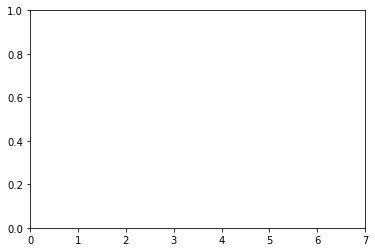

28 3750.0 8.8


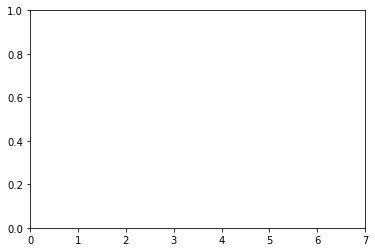

29 5000.0 8.8


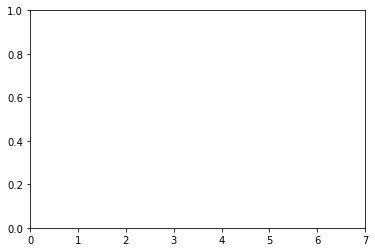

30 7500.0 8.8


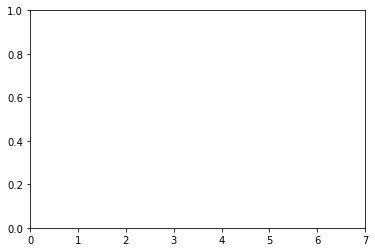

31 8750.0 8.8


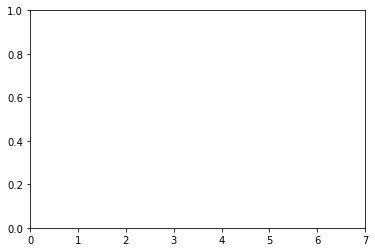

32 10000.0 8.8


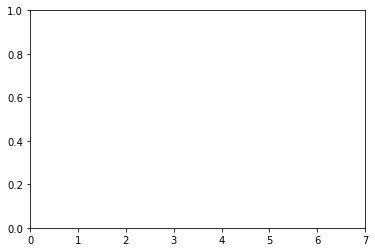

33 12500.0 8.8


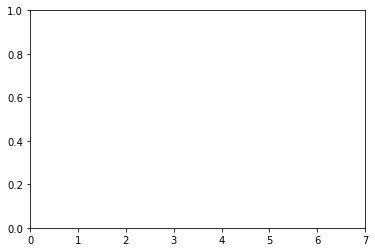

34 15000.0 8.8


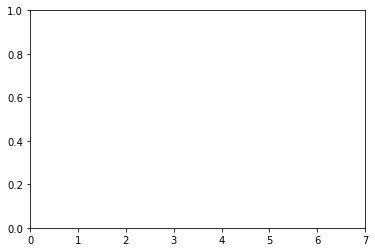

35 3750.0 9.0


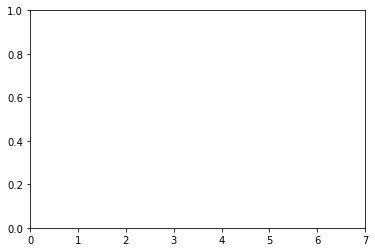

36 5000.0 9.0


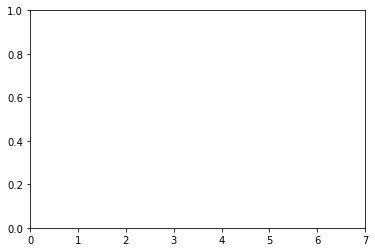

37 7500.0 9.0


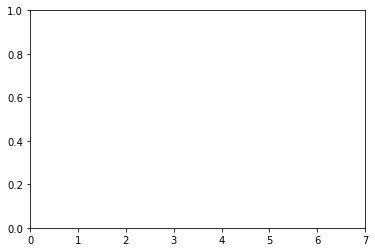

38 8750.0 9.0


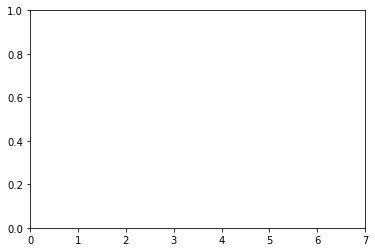

39 10000.0 9.0


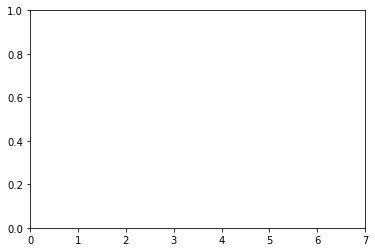

40 12500.0 9.0


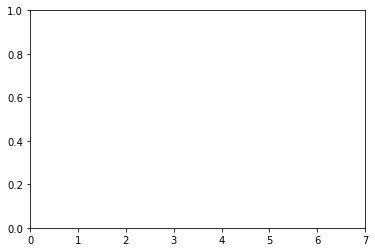

41 15000.0 9.0


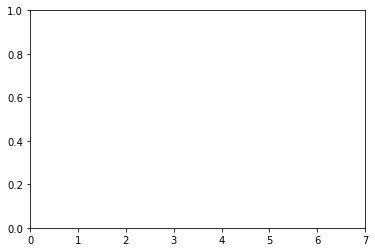

42 3750.0 9.2


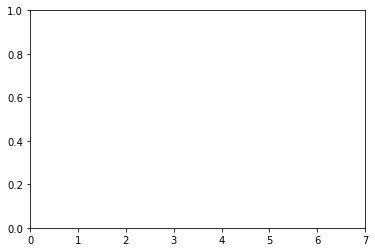

43 5000.0 9.2


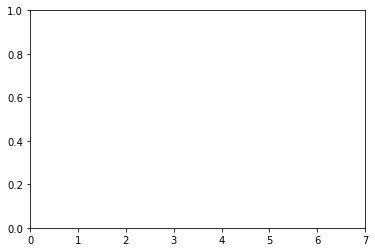

44 7500.0 9.2


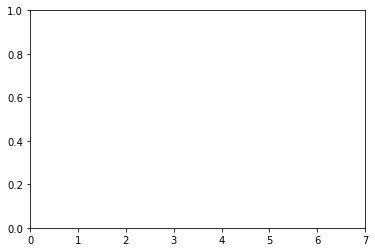

45 8750.0 9.2


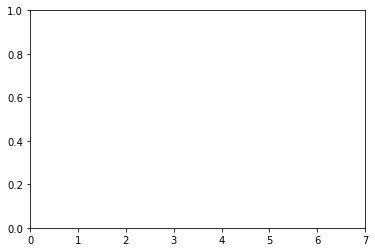

46 10000.0 9.2


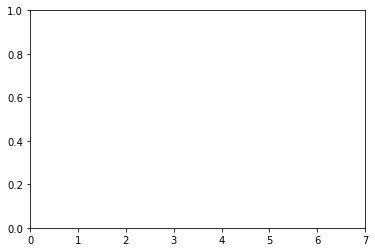

47 12500.0 9.2


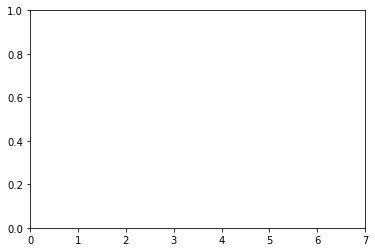

48 15000.0 9.2


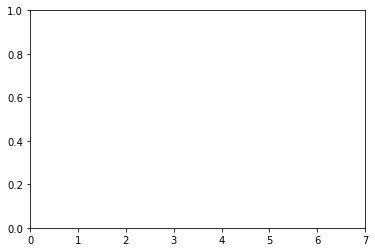

49 3750.0 9.4


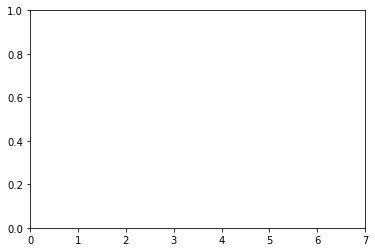

50 5000.0 9.4


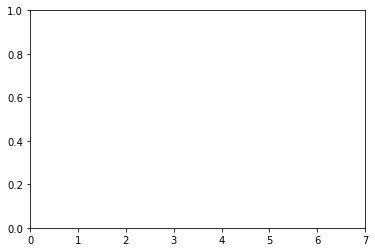

51 7500.0 9.4


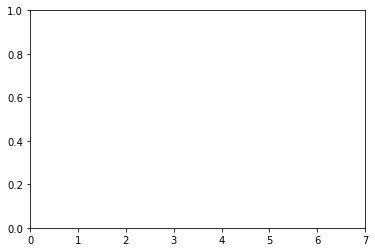

52 8750.0 9.4


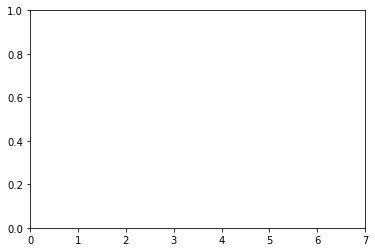

53 10000.0 9.4


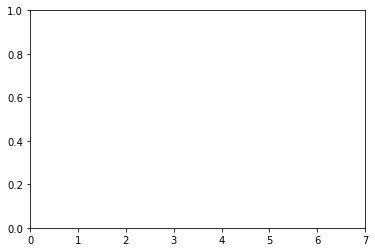

54 12500.0 9.4


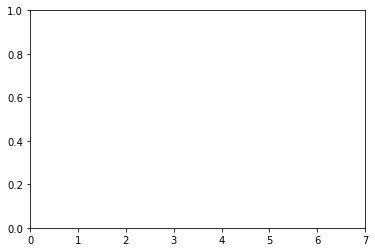

55 15000.0 9.4


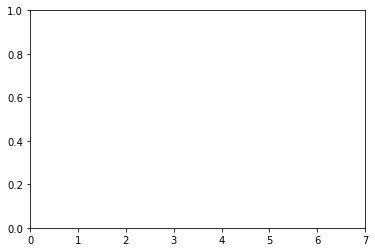

56 3750.0 9.6


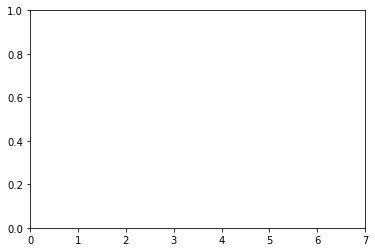

57 5000.0 9.6


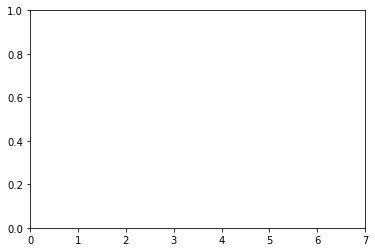

58 7500.0 9.6


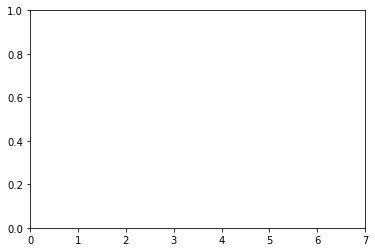

59 8750.0 9.6


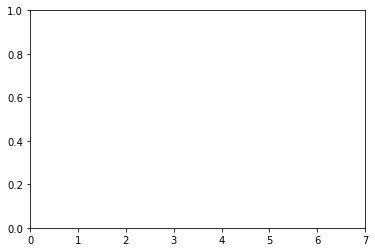

60 10000.0 9.6


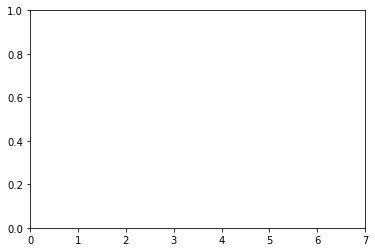

61 12500.0 9.6


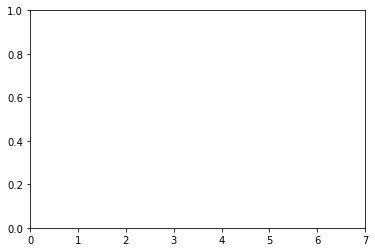

62 15000.0 9.6


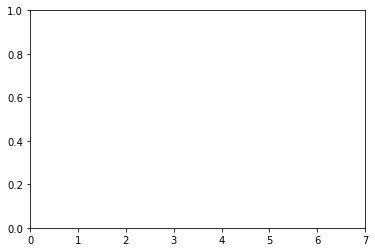

63 3750.0 9.8


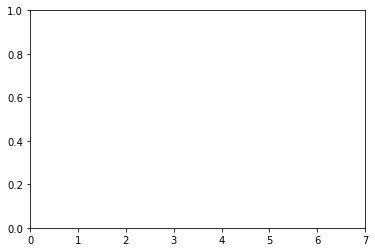

64 5000.0 9.8


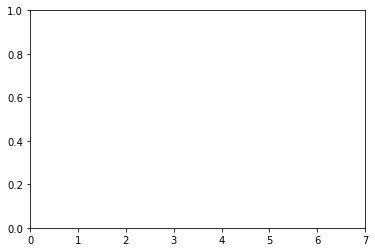

65 7500.0 9.8


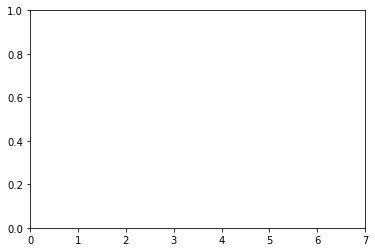

66 8750.0 9.8


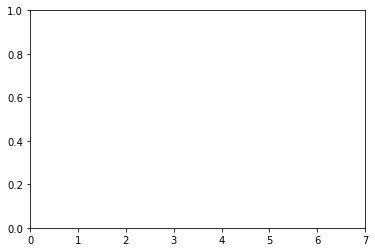

67 10000.0 9.8


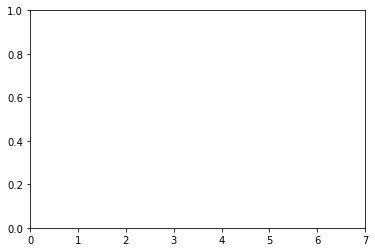

68 12500.0 9.8


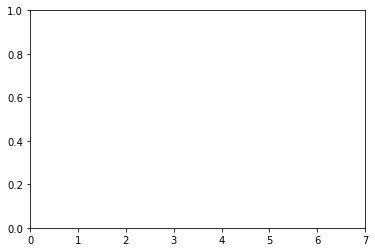

69 15000.0 9.8


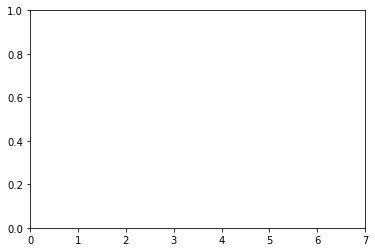

70 3750.0 10.0


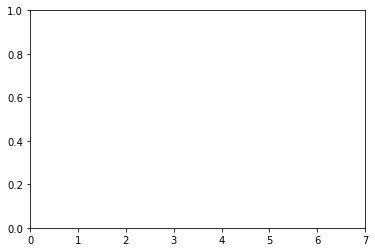

71 5000.0 10.0


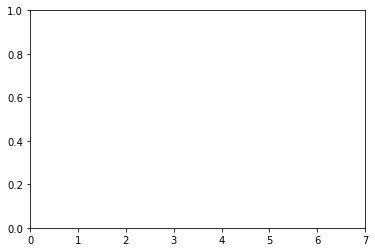

72 7500.0 10.0


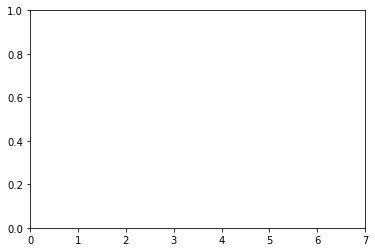

73 8750.0 10.0


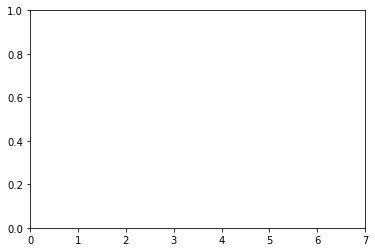

74 10000.0 10.0


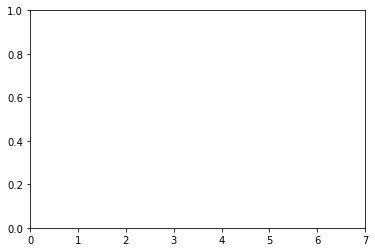

75 12500.0 10.0


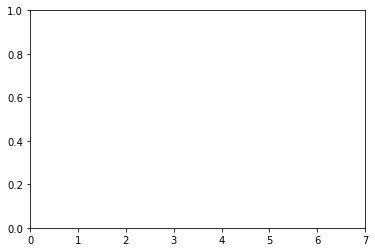

76 15000.0 10.0


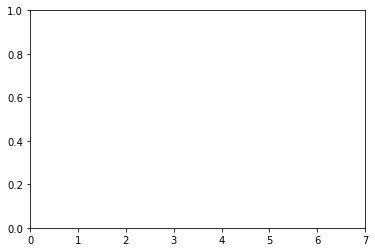

77 3750.0 10.2


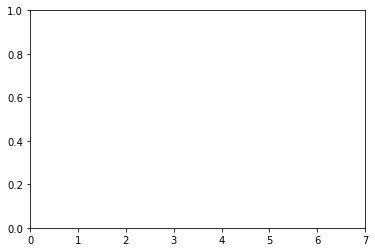

78 5000.0 10.2


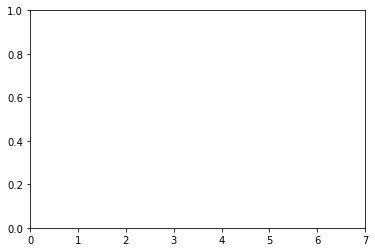

79 7500.0 10.2


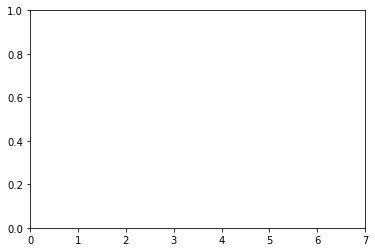

80 8750.0 10.2


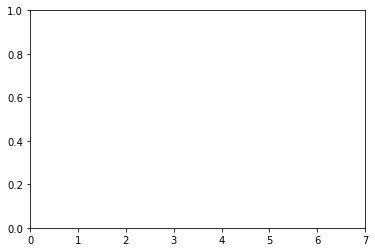

81 10000.0 10.2


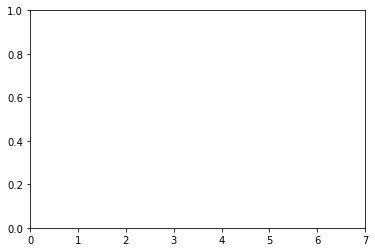

82 12500.0 10.2


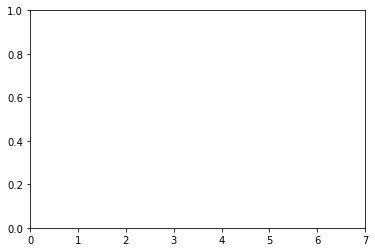

83 15000.0 10.2


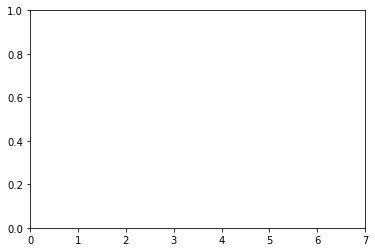

84 3750.0 10.4


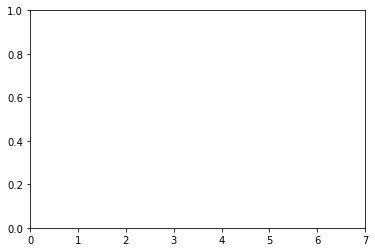

85 5000.0 10.4


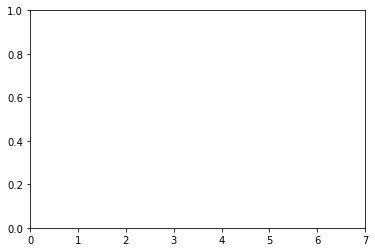

86 7500.0 10.4


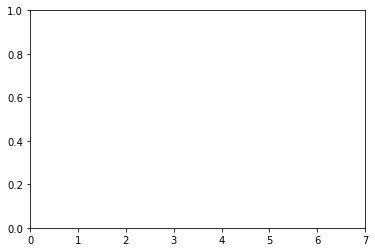

87 8750.0 10.4


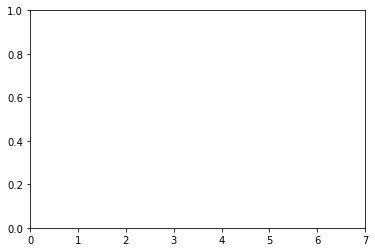

88 10000.0 10.4


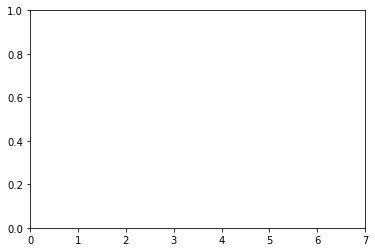

89 12500.0 10.4


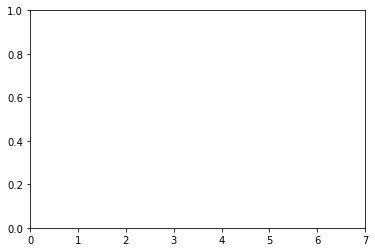

90 15000.0 10.4


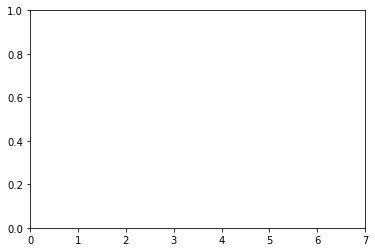

91 3750.0 10.6


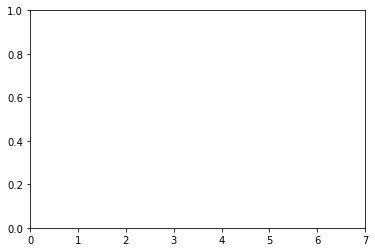

92 5000.0 10.6


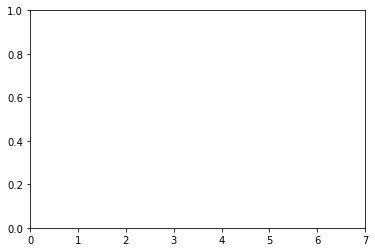

93 7500.0 10.6


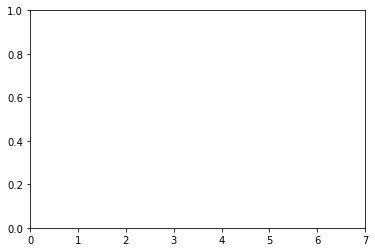

94 8750.0 10.6


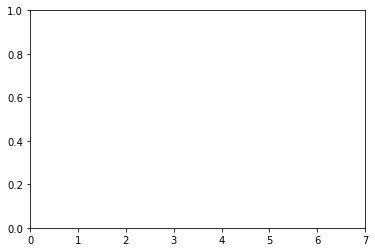

95 10000.0 10.6


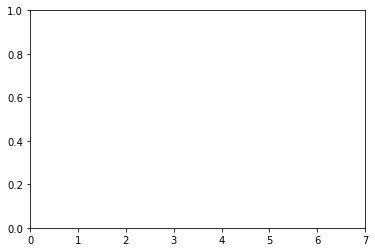

96 12500.0 10.6


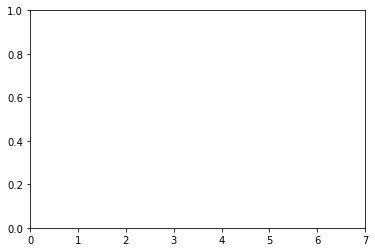

97 15000.0 10.6


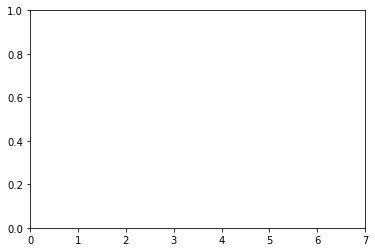

98 3750.0 10.8


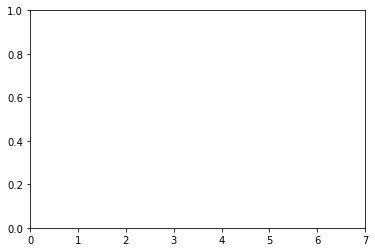

99 5000.0 10.8


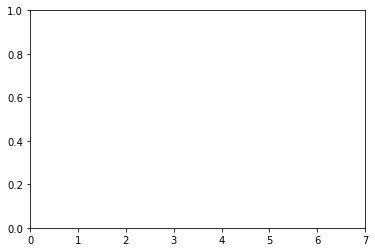

100 7500.0 10.8


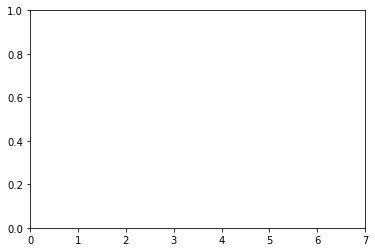

101 8750.0 10.8


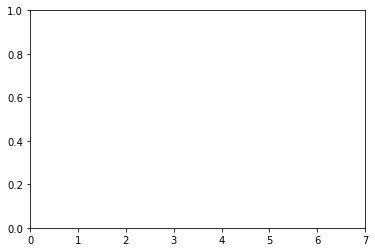

102 10000.0 10.8


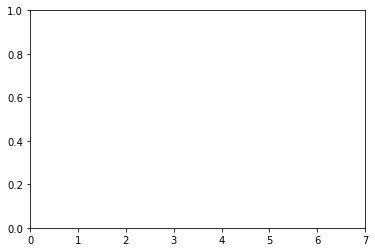

103 12500.0 10.8


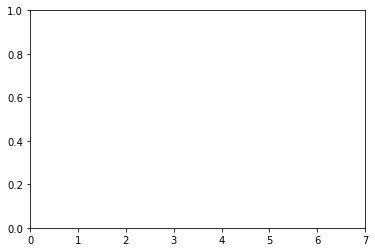

104 15000.0 10.8


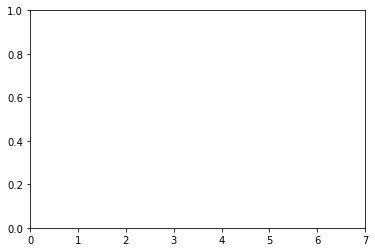

105 3750.0 11.0


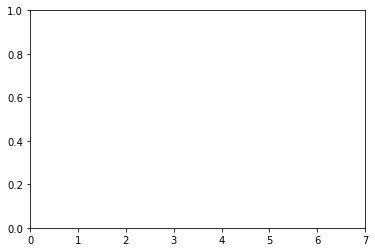

106 5000.0 11.0


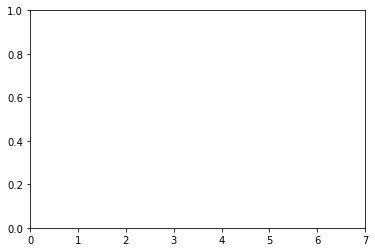

107 7500.0 11.0


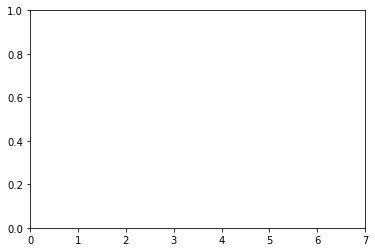

108 8750.0 11.0


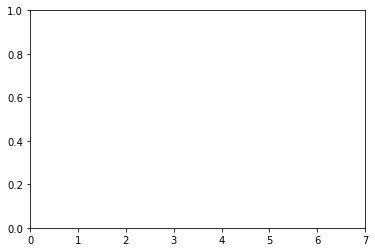

109 10000.0 11.0


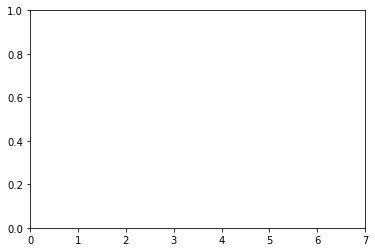

110 12500.0 11.0


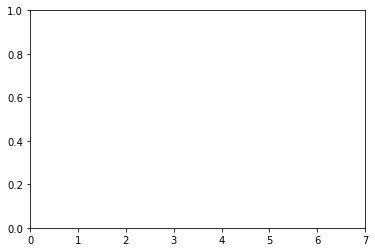

111 15000.0 11.0


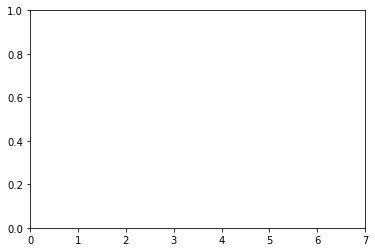

112 3750.0 11.2


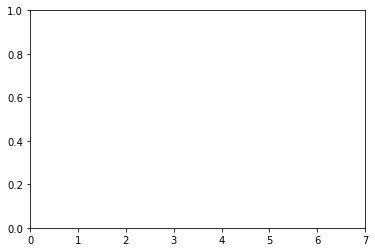

113 5000.0 11.2


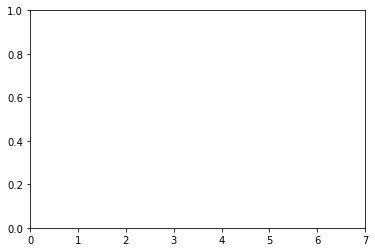

114 7500.0 11.2


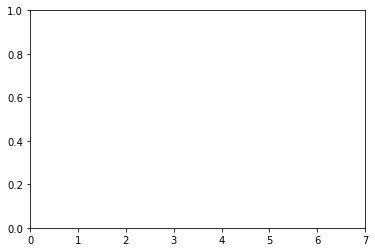

115 8750.0 11.2


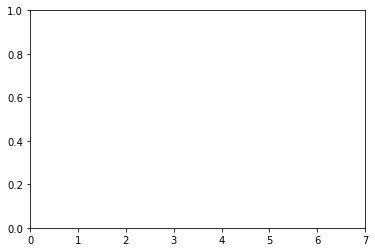

116 10000.0 11.2


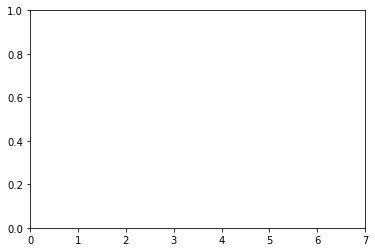

117 12500.0 11.2


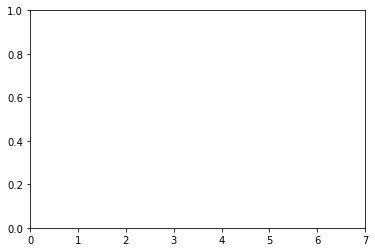

118 15000.0 11.2


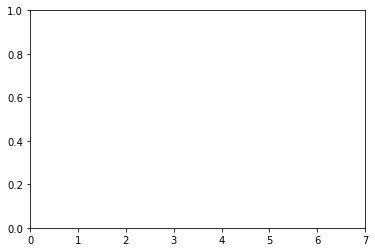

119 3750.0 11.4


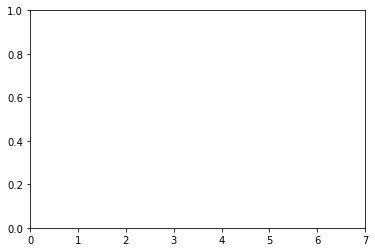

120 5000.0 11.4


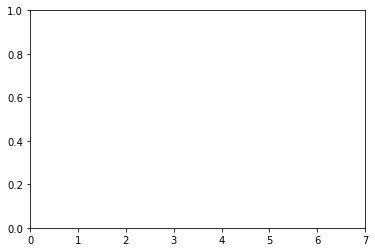

121 7500.0 11.4


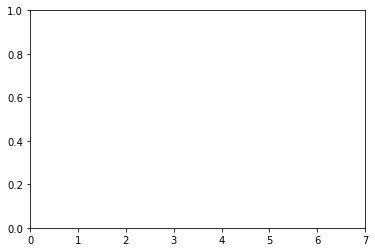

122 8750.0 11.4


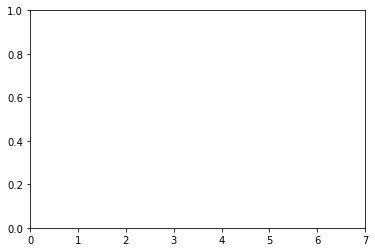

123 10000.0 11.4


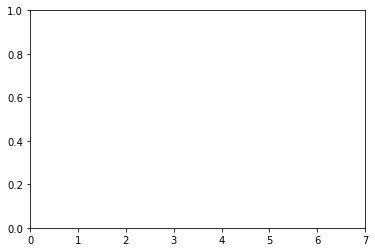

124 12500.0 11.4


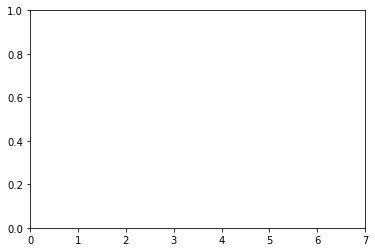

125 15000.0 11.4


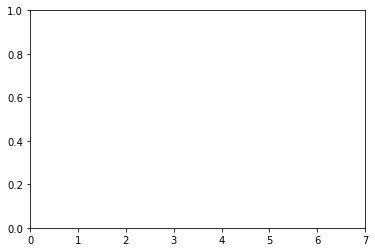

126 3750.0 11.6


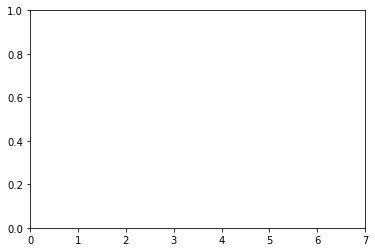

127 5000.0 11.6


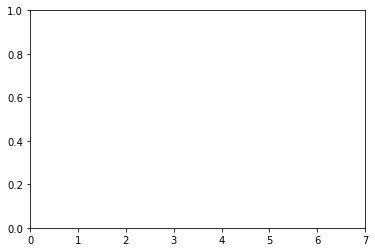

128 7500.0 11.6


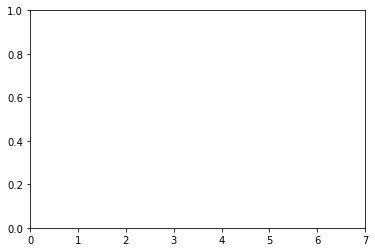

129 8750.0 11.6


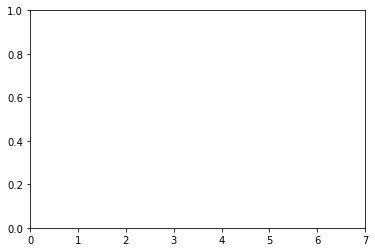

130 10000.0 11.6


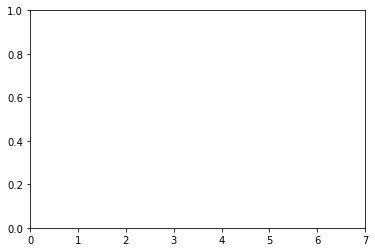

131 12500.0 11.6


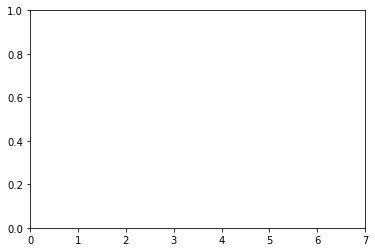

132 15000.0 11.6


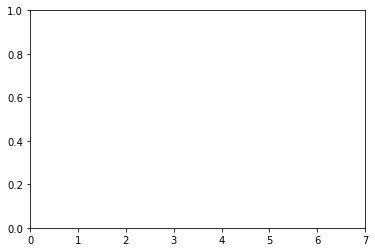

133 3750.0 11.8


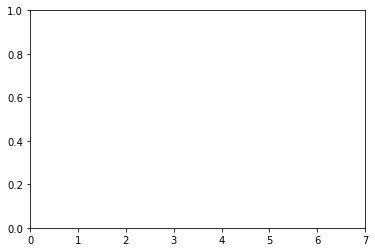

134 5000.0 11.8


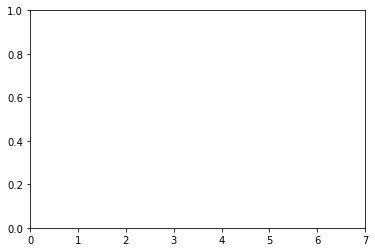

135 7500.0 11.8


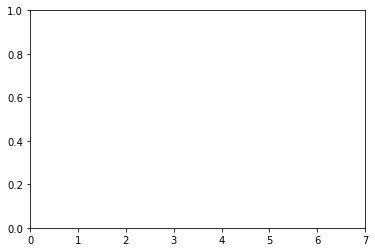

136 8750.0 11.8


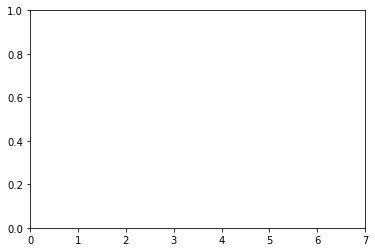

137 10000.0 11.8


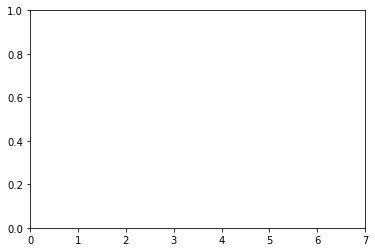

138 12500.0 11.8


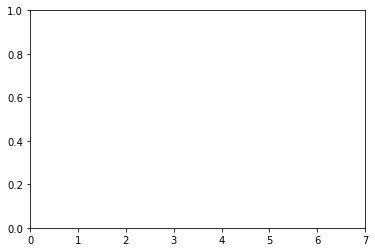

139 15000.0 11.8


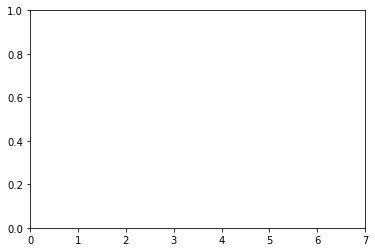

140 3750.0 12.0


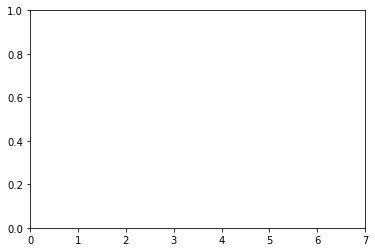

141 5000.0 12.0


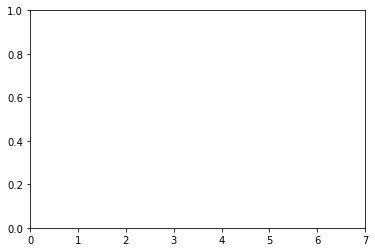

142 7500.0 12.0


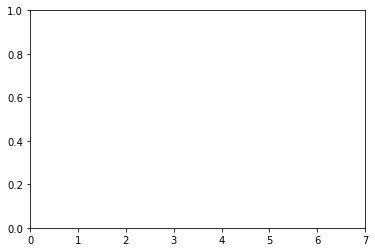

143 8750.0 12.0


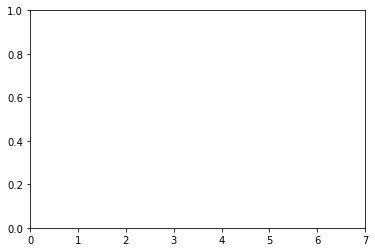

144 10000.0 12.0


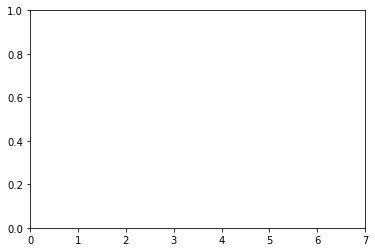

145 12500.0 12.0


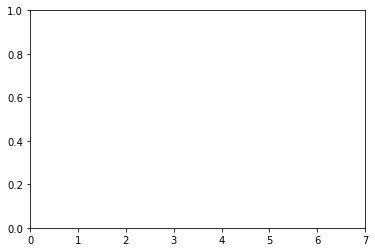

146 15000.0 12.0


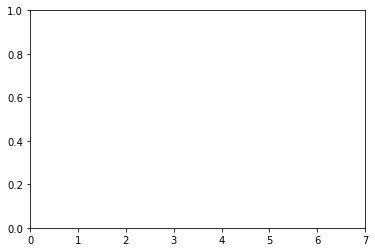

147 3750.0 12.2


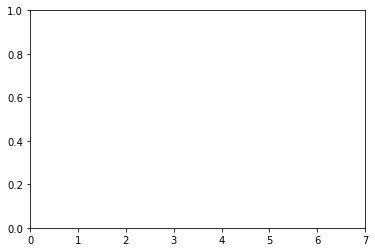

148 5000.0 12.2


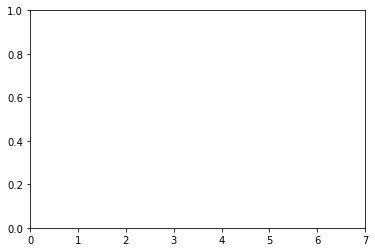

149 7500.0 12.2


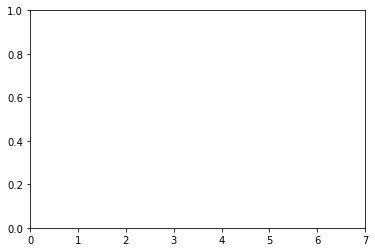

150 8750.0 12.2


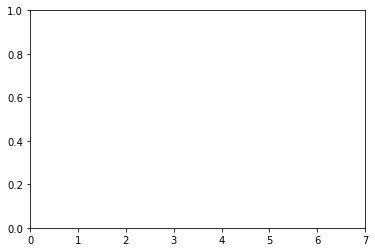

151 10000.0 12.2


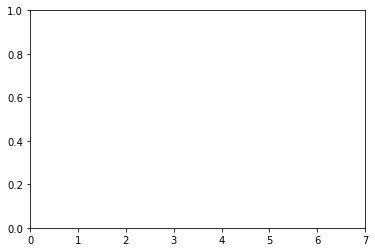

152 12500.0 12.2


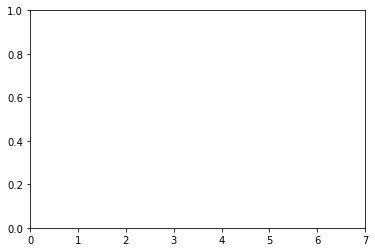

153 15000.0 12.2


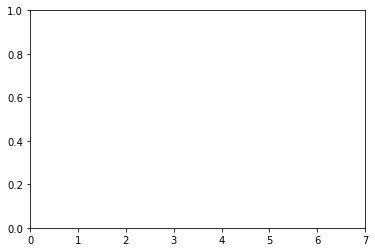

154 3750.0 12.4


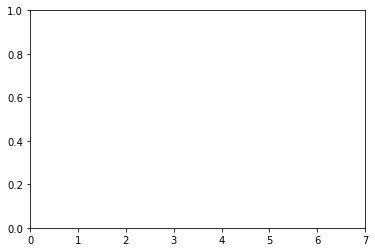

155 5000.0 12.4


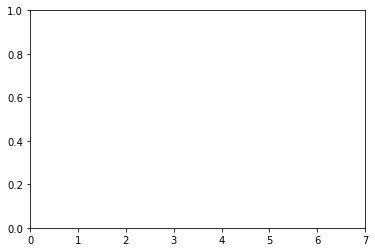

156 7500.0 12.4


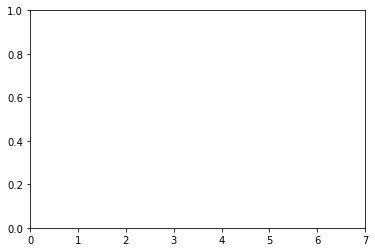

157 8750.0 12.4


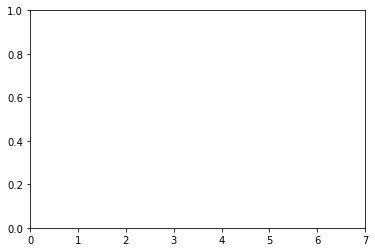

158 10000.0 12.4


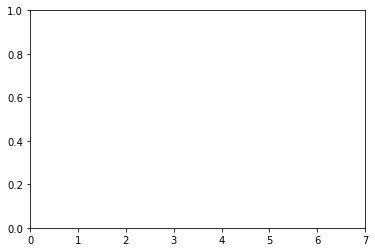

159 12500.0 12.4


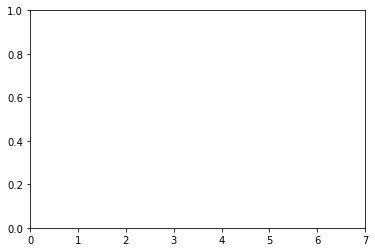

160 15000.0 12.4


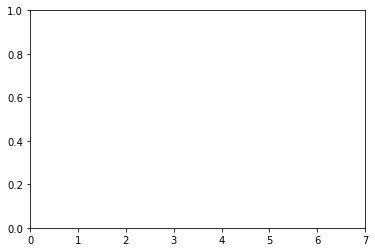

In [35]:
for i in range(len(g)):
    fig,ax = plt.subplots()
    ax.plot(s['ba_observed'][0])
    ax.plot(g['model'][i][:s['ba_goodlines'][0]])
    ax.set_xlim(0,7)
    ax.set_ylim(0,1)
    print(i,g['teff'][i],g['logn'][i])
    #plt.plot(s['observed'][28])
    fig.canvas.draw()
    plt.show()

In [20]:
g['model']

1.0 .. 0.0004664525339043541
1.0 .. 0.00046052631578947373
1.0 .. 0.00043868255080588655
1.0 .. 0.0003615631005765535
1.0 .. 0.00020428940568475453
1.0 .. 7.139107611548557e-05
1.0 .. 6.857440166493236e-05
1.0 .. 0.0003025091799265606
1.0 .. 0.0002936131386861314
1.0 .. 0.00026975638740344625
1.0 .. 0.0002026638252530634


In [156]:
s.write("sagitta2.fits", overwrite = True)

In [23]:
#s['best_model'].info.name = 'H_best_model'
#s['goodlines'].info.name = 'H_goodlines'
#s['observed'].info.name = 'H_observed'
#s['avg_std'].info.name = 'H_avg_std'
#s['best_chisquare'].info.name = 'H_best_chisquare'


In [134]:
print(len(s))

4878


In [130]:
s

healpix_path,ra,dec,catalogid,firstcarton,parallax,sn_median_all,g,bp,rp,j,h,k,field,mjd,pred_logg,pred_logteff,pred_feh,halpha_eqw,halpha_abs,halpha_detection [2],halpha_eqw_std [3],halpha_abs_std [3],hbeta_eqw,hbeta_abs,hbeta_detection [2],hbeta_eqw_std [3],hbeta_abs_std [3],hgamma_eqw,hgamma_abs,hgamma_detection [2],hgamma_eqw_std [3],hgamma_abs_std [3],hdelta_eqw,hdelta_abs,hdelta_detection [2],hdelta_eqw_std [3],hdelta_abs_std [3],hepsilon_eqw,hepsilon_abs,hepsilon_detection [2],hepsilon_eqw_std [3],hepsilon_abs_std [3],h8_eqw,h8_abs,h8_detection [2],h8_eqw_std [3],h8_abs_std [3],h9_eqw,h9_abs,h9_detection [2],h9_eqw_std [3],h9_abs_std [3],h10_eqw,h10_abs,h10_detection [2],h10_eqw_std [3],h10_abs_std [3],h11_eqw,h11_abs,h11_detection [2],h11_eqw_std [3],h11_abs_std [3],h12_eqw,h12_abs,h12_detection [2],h12_eqw_std [3],h12_abs_std [3],h13_eqw,h13_abs,h13_detection [2],h13_eqw_std [3],h13_abs_std [3],h14_eqw,h14_abs,h14_detection [2],h14_eqw_std [3],h14_abs_std [3],h15_eqw,h15_abs,h15_detection [2],h15_eqw_std [3],h15_abs_std [3],h16_eqw,h16_abs,h16_detection [2],h16_eqw_std [3],h16_abs_std [3],h17_eqw,h17_abs,h17_detection [2],h17_eqw_std [3],h17_abs_std [3],pa7_eqw,pa7_abs,pa7_detection [2],pa7_eqw_std [3],pa7_abs_std [3],pa8_eqw,pa8_abs,pa8_detection [2],pa8_eqw_std [3],pa8_abs_std [3],pa9_eqw,pa9_abs,pa9_detection [2],pa9_eqw_std [3],pa9_abs_std [3],pa10_eqw,pa10_abs,pa10_detection [2],pa10_eqw_std [3],pa10_abs_std [3],pa11_eqw,pa11_abs,pa11_detection [2],pa11_eqw_std [3],pa11_abs_std [3],pa12_eqw,pa12_abs,pa12_detection [2],pa12_eqw_std [3],pa12_abs_std [3],pa13_eqw,pa13_abs,pa13_detection [2],pa13_eqw_std [3],pa13_abs_std [3],pa14_eqw,pa14_abs,pa14_detection [2],pa14_eqw_std [3],pa14_abs_std [3],pa15_eqw,pa15_abs,pa15_detection [2],pa15_eqw_std [3],pa15_abs_std [3],pa16_eqw,pa16_abs,pa16_detection [2],pa16_eqw_std [3],pa16_abs_std [3],pa17_eqw,pa17_abs,pa17_detection [2],pa17_eqw_std [3],pa17_abs_std [3],caii8662_eqw,caii8662_abs,caii8662_detection [2],caii8662_eqw_std [3],caii8662_abs_std [3],caii8542_eqw,caii8542_abs,caii8542_detection [2],caii8542_eqw_std [3],caii8542_abs_std [3],caii8498_eqw,caii8498_abs,caii8498_detection [2],caii8498_eqw_std [3],caii8498_abs_std [3],cak3933_eqw,cak3933_abs,cak3933_detection [2],cak3933_eqw_std [3],cak3933_abs_std [3],cah3968_eqw,cah3968_abs,cah3968_detection [2],cah3968_eqw_std [3],cah3968_abs_std [3],hei6678_eqw,hei6678_abs,hei6678_detection [2],hei6678_eqw_std [3],hei6678_abs_std [3],hei5875_eqw,hei5875_abs,hei5875_detection [2],hei5875_eqw_std [3],hei5875_abs_std [3],hei5015_eqw,hei5015_abs,hei5015_detection [2],hei5015_eqw_std [3],hei5015_abs_std [3],hei4471_eqw,hei4471_abs,hei4471_detection [2],hei4471_eqw_std [3],hei4471_abs_std [3],heii4685_eqw,heii4685_abs,heii4685_detection [2],heii4685_eqw_std [3],heii4685_abs_std [3],nii6583_eqw,nii6583_abs,nii6583_detection [2],nii6583_eqw_std [3],nii6583_abs_std [3],nii6548_eqw,nii6548_abs,nii6548_detection [2],nii6548_eqw_std [3],nii6548_abs_std [3],sii6716_eqw,sii6716_abs,sii6716_detection [2],sii6716_eqw_std [3],sii6716_abs_std [3],sii6730_eqw,sii6730_abs,sii6730_detection [2],sii6730_eqw_std [3],sii6730_abs_std [3],feii5018_eqw,feii5018_abs,feii5018_detection [2],feii5018_eqw_std [3],feii5018_abs_std [3],feii5169_eqw,feii5169_abs,feii5169_detection [2],feii5169_eqw_std [3],feii5169_abs_std [3],feii5197_eqw,feii5197_abs,feii5197_detection [2],feii5197_eqw_std [3],feii5197_abs_std [3],feii6432_eqw,feii6432_abs,feii6432_detection [2],feii6432_eqw_std [3],feii6432_abs_std [3],oi5577_eqw,oi5577_abs,oi5577_detection [2],oi5577_eqw_std [3],oi5577_abs_std [3],oi6300_eqw,oi6300_abs,oi6300_detection [2],oi6300_eqw_std [3],oi6300_abs_std [3],oi6363_eqw,oi6363_abs,oi6363_detection [2],oi6363_eqw_std [3],oi6363_abs_std [3],oii3727_eqw,oii3727_abs,oii3727_detection [2],oii3727_eqw_std [3],oii3727_abs_std [3],oiii4959_eqw,oiii4959_abs,oiii4959_detection [2],oiii4959_eqw_std [3],oiii4959_abs_std [3],oiii5006_eqw,oiii5006_abs,oiii5006_detection 